In [2]:
import pandas as pd
df=pd.read_csv('c:/data/ozone/ozone.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Ozone2
0,41.0,190.0,7.4,67,5,1,41.00000
1,36.0,118.0,8.0,72,5,2,36.00000
2,12.0,149.0,12.6,74,5,3,12.00000
3,18.0,313.0,11.5,62,5,4,18.00000
4,NaN,NaN,14.3,56,5,5,42.12931
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,30.00000
149,NaN,145.0,13.2,77,9,27,42.12931
150,14.0,191.0,14.3,75,9,28,14.00000
151,18.0,131.0,8.0,76,9,29,18.00000


<AxesSubplot:>

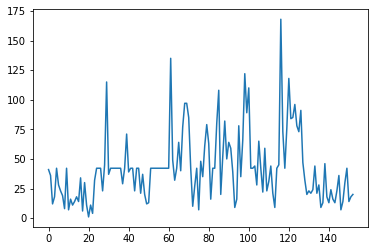

In [3]:
df['Ozone2'].plot()

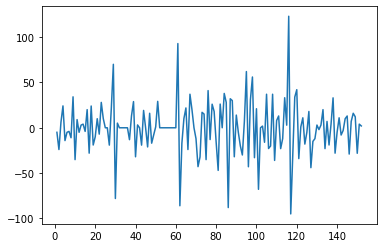

In [4]:
import matplotlib.pyplot as plt
diff1=df['Ozone2'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1=np.log(df['Ozone2']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print(result[0])
print(result[1])

(-9.189875590807723, 2.137582906982084e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.55299349906795)
-9.189875590807723
2.137582906982084e-15


In [7]:
from pmdarima.arima import auto_arima
model=auto_arima(df['Ozone2'],suppress_warnings=True)
model

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [8]:
n=int(df.shape[0]*0.8)
train=df[:n]
test=df[n:]

In [9]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Ozone2'],order=(1,0,1)).fit()

In [10]:
fore=model.forecast(steps=5)
print(fore)

(array([68.40828969, 61.06902174, 56.01410012, 52.53252229, 50.13458517]), array([26.39598989, 27.87511772, 28.54999579, 28.8646247 , 29.01268416]), array([[ 1.66731002e+01,  1.20143479e+02],
       [ 6.43479494e+00,  1.15703249e+02],
       [ 5.71366008e-02,  1.11971064e+02],
       [-4.04110256e+00,  1.09106147e+02],
       [-6.72923088e+00,  1.06998401e+02]]))


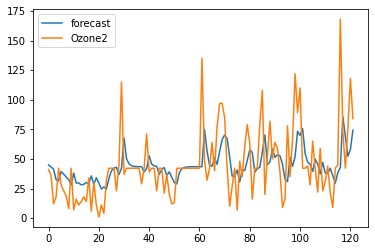

In [11]:
model.plot_predict()
plt.show()

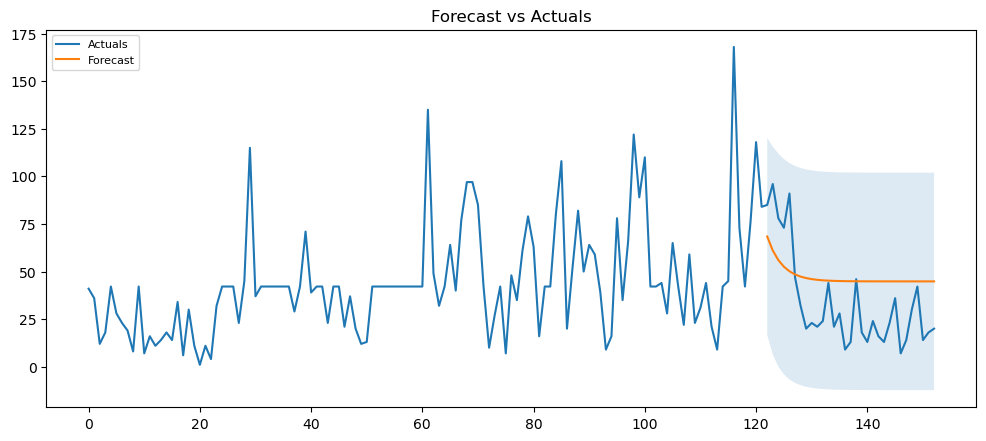

In [13]:
fc, se, conf = model.forecast(steps=len(test))
fc_series = pd.Series(fc,index=test.index)
lower = pd.Series(conf[:, 0],index=test.index)
upper = pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Ozone2'], label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()